In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import finesse
from finesse.analysis.actions import RunLocks, Noxaxis, Xaxis
from finesse import ligo
from LLOF3NoSqz import make_LLO

from finesse.knm.maps import Map
from finesse.utilities.maps import surface_point_absorber as spa

finesse.configure(plotting=True)

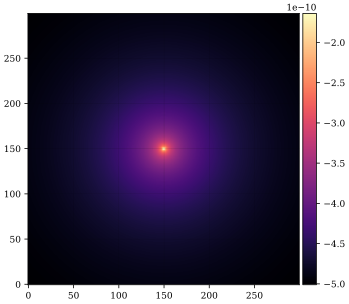

In [46]:
# help(spa)
a = 0.17 # mirror radius
h = 0.2  # mirror thickness
w0 = 53e-3 # spot size radius
w = 100e-6 # absorber size
Pabs = 1e-3 # power absorbed
xs = ys = np.linspace(-a, a, 300) # radial points

spa_0 = spa(xs, ys, w, h, Pabs)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

im = ax.imshow(spa_0)

plt.grid(visible=False)
plt.colorbar(im, cax=cax, orientation='vertical')
plt.show()

# fig.savefig('PointAbsorber.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

In [20]:
LIGO = finesse.Model()
LIGO.parse_file("./LIGO_degisn.txt")

LLObase = make_LLO(LIGO.deepcopy())

# Anamaria's numbers
LLO = LLObase.deepcopy()
LLO.ETMX.L = 44e-6 # From Anamaria's email
LLO.ETMY.L = 44e-6
LLO.ITMX.L = 25e-6
LLO.ITMY.L = 25e-6

In [33]:
kat = LLO.deepcopy()
kat.DARM.DC = 0.0033834586466165405/2

kat.ETMY.surface_map = Map(xs, ys, opd=spa_0)

kat.parse(f"""
pd Pin PRMAR.p1.i
pd Pcirc PRM.p2.o
""")

outLLO = kat.run(Noxaxis(pre_step=RunLocks(method='newton', 
                                            display_progress=False,
                                            max_iterations=1000)))

PRG = outLLO['Pcirc']/outLLO['Pin']
PRG

47.61554227227837

In [40]:
kat = LLO.deepcopy()
kat.DARM.DC = 0.0033834586466165405/2
kat.parse(f"""
pd Pin PRMAR.p1.i
pd Pcirc PRM.p2.o
""")

PRG = []
for idx, pabs in enumerate(np.linspace(1, 20, 200)*Pabs):
    kat1 = kat.deepcopy()
    
    spa_data = spa(xs, ys, w, h, pabs)
    kat1.ETMY.surface_map = Map(xs, ys, opd=spa_data)
    
    outLLO = kat1.run(Noxaxis(pre_step=RunLocks(method='newton', 
                                            display_progress=False,
                                            max_iterations=1000)))
    
    PRG.append(outLLO['Pcirc']/outLLO['Pin'])
    
    if idx%20==0:
        print(f"{idx} steps are done...")

0 steps are done...
20 steps are done...
40 steps are done...
60 steps are done...
80 steps are done...
100 steps are done...
120 steps are done...
140 steps are done...
160 steps are done...
180 steps are done...


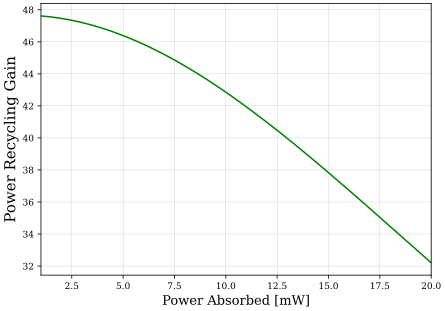

In [45]:
xaxis = np.linspace(1, 20, 200)*Pabs*1e3

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(xaxis, PRG, color="g")

ax.set_ylabel("Power Recycling Gain", fontsize=15)
ax.set_xlabel("Power Absorbed [mW]", fontsize=13)
# fig.savefig('PRGPointAbsorber.pdf', bbox_inches='tight', dpi=120, pad_inches=0.01)

In [37]:
13%10

3